In [1]:
%pylab inline
import yt
import yt.units as units

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
bbox = [[-89000, 89000],
        [-89000, 89000],
        [-89000, 89000]]
 
ds = yt.load('MWN1virf-cont_000.hdf5',bounding_box=bbox)
ds.index
ad= ds.all_data()

yt : [INFO     ] 2016-03-01 16:32:44,618 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2016-03-01 16:32:44,620 Assuming length units are in kpc (physical)
yt : [INFO     ] 2016-03-01 16:32:44,670 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-01 16:32:44,671 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2016-03-01 16:32:44,673 Parameters: domain_left_edge          = [-89000. -89000. -89000.]
yt : [INFO     ] 2016-03-01 16:32:44,675 Parameters: domain_right_edge         = [ 89000.  89000.  89000.]
yt : [INFO     ] 2016-03-01 16:32:44,677 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2016-03-01 16:32:44,683 Allocating for 2.700e+06 particles
yt : [INFO     ] 2016-03-01 16:32:46,434 Identified 1.616e+05 octs
yt : [INFO     ] 2016-03-01 16:32:46,587 Loading field plugins.
yt : [INFO     ] 2016-03-01 16:32:46,588 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-01 16:32:46,589 Loaded astro (15 new 

In [38]:
px = yt.ProjectionPlot(ds, 'z', 'Potential')
px.show()

ValueError: operands could not be broadcast together with shapes (2700000,) (1127680,) 

In [10]:
ds.field_list

[('PartType1', 'Coordinates'),
 ('PartType1', 'Masses'),
 ('PartType1', 'ParticleIDs'),
 ('PartType1', 'Potential'),
 ('PartType1', 'Velocities'),
 ('PartType2', 'Coordinates'),
 ('PartType2', 'Masses'),
 ('PartType2', 'ParticleIDs'),
 ('PartType2', 'Potential'),
 ('PartType2', 'Velocities'),
 ('PartType3', 'Coordinates'),
 ('PartType3', 'Masses'),
 ('PartType3', 'ParticleIDs'),
 ('PartType3', 'Potential'),
 ('PartType3', 'Velocities'),
 ('all', 'Masses'),
 ('all', 'Potential'),
 ('all', 'Velocities'),
 ('all', 'Coordinates'),
 ('all', 'ParticleIDs')]

yt : [INFO     ] 2016-03-01 17:04:54,594 xlim = -89000.000000 89000.000000
yt : [INFO     ] 2016-03-01 17:04:54,595 ylim = -89000.000000 89000.000000
yt : [INFO     ] 2016-03-01 17:04:54,599 xlim = -89000.000000 89000.000000
yt : [INFO     ] 2016-03-01 17:04:54,600 ylim = -89000.000000 89000.000000
yt : [INFO     ] 2016-03-01 17:04:54,602 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh
yt : [INFO     ] 2016-03-01 17:04:56,595 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



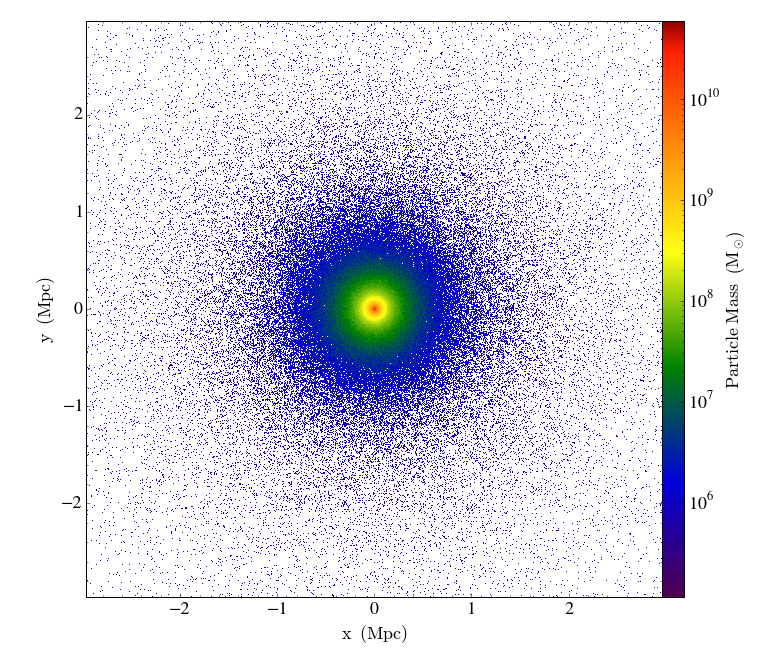

In [11]:
p = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_y', 'particle_mass')
p.set_unit('particle_mass', 'Msun')
p.zoom(30)
